In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
df = pd.read_csv('project-group-project-4-master/data/data_final.csv' )
df.head()

Year      Country  Refugees under UNHCR's mandate  Asylum-seekers  \
0  2016  El Salvador                            41.0             0.0   
1  2018  El Salvador                            44.0            16.0   
2  2016       Mexico                          6178.0          2636.0   
3  2016     Colombia                           241.0           368.0   
4  2018     Colombia                           294.0          2851.0   

   IDPs of concern to UNHCR  Stateless persons  Others of concern  \
0                       0.0                0.0             9800.0   
1                   71501.0                0.0             4700.0   
2                       0.0               13.0                0.0   
3                 7410816.0               11.0                0.0   
4                 7816473.0               11.0                0.0   

   Ref and Asyl  SUM REFUGEE  GDP_annual_change  ...  GNI growth (annual %)  \
0          41.0       9841.0           2.545926  ...               1.962239   
1          60.0      76261.0           2.432288  ...               2.420301   
2        8814.0       8827.0           2.630532  ...               2.526165   
3         609.0    7411436.0           2.087383  ...               2.422212   
4        3145.0    7819629.0           2.564324  ...               1.748331   

   International tourism, expenditures (current US$)  \
0                                       4.510000e+08   
1                                       4.900000e+08   
2                                       1.282300e+10   
3                                       4.891000e+09   
4                                       5.531000e+09   

   International tourism, receipts (current US$)  \
0                                   1.161000e+09   
1                                   1.370000e+09   
2                                   2.061900e+10   
3                                   5.631000e+09   
4                                   6.655000e+09   

   Military expenditure (current USD)  Population growth (annual %)  \
0                        2.476000e+08                      0.489164   
1                        2.946100e+08                      0.509273   
2                        5.336876e+09                      1.203260   
3                        8.675981e+09                      1.367650   
4                        1.013472e+10                      1.524236   

   Prevalence of undernourishment (% of population)  \
0                                               9.9   
1                                               8.6   
2                                               5.8   
3                                               6.8   
4                                               7.9   

   Refugee population by country or territory of asylum  \
0                                               41.0      
1                                               44.0      
2                                             6178.0      
3                                              241.0      
4                                              294.0      

   Strength of legal rights index (0=weak to 12=strong)  \
0                                                9.0      
1                                                9.0      
2                                               10.0      
3                                               11.0      
4                                               11.0      

   Unemployment, total (% of total labor force) (modeled ILO estimate)  \
0                                               4.42                     
1                                               4.01                     
2                                               3.86                     
3                                               8.69                     
4                                               9.11                     

   Net official flows from UN agencies: Total  
0                                6.561136e+06  
1                    

In [9]:
df_temp = df[['Year','Country','Ref and Asyl','GDP_annual_change']]

In [10]:
df_temp.head()

Year      Country  Ref and Asyl  GDP_annual_change
391  2016  Afghanistan       59893.0           2.260314
388  2017  Afghanistan       76142.0           2.647003
431  2018  Afghanistan       72509.0           1.189228
471  2019  Afghanistan       72474.0           3.911603
76   2016      Albania        2891.0           3.314981

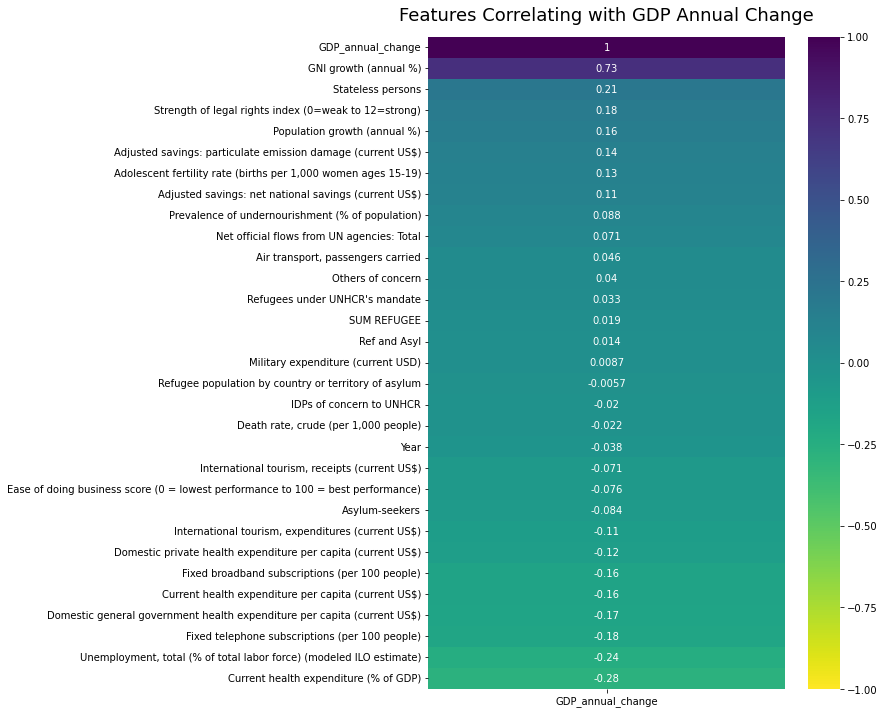

In [69]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['GDP_annual_change']].sort_values(by='GDP_annual_change', ascending=False), vmin=-1, vmax=1, annot=True, cmap='viridis_r')
heatmap.set_title('Features Correlating with GDP Annual Change', fontdict={'fontsize':18}, pad=16);

In [7]:
df.sort_values(by=['Country','Year'],inplace=True)

## Refugee and Asylum seekers plotted with GDP Annual Change

#### This is a lot to look at.  Will breakdown in to geographic regions and Income Status and then try again.

C:\Users\benro\AppData\Local\Temp/ipykernel_17616/3831816844.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax1 = plt.subplots()


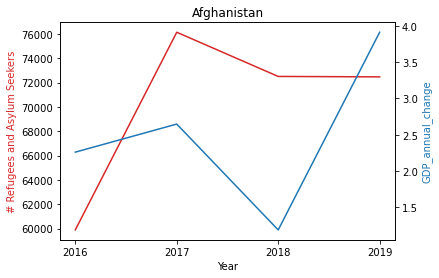

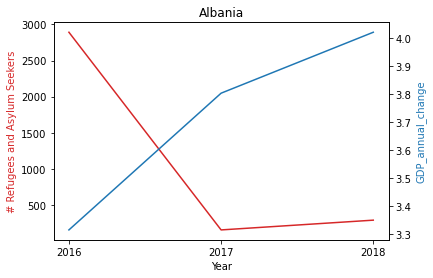

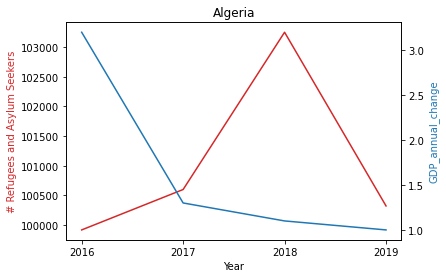

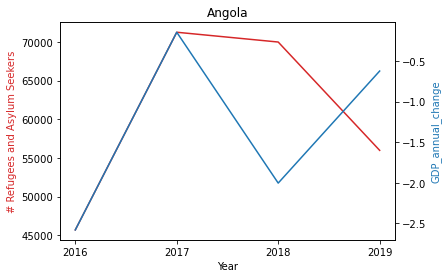

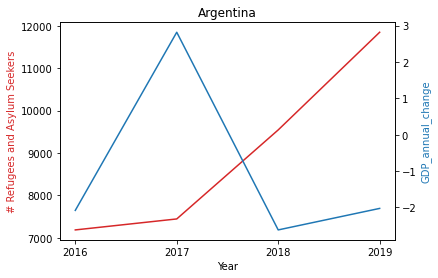

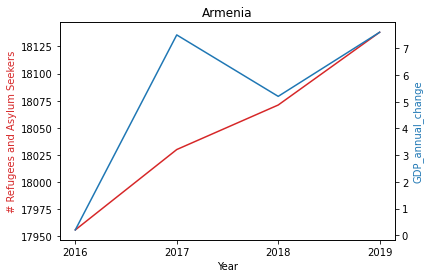

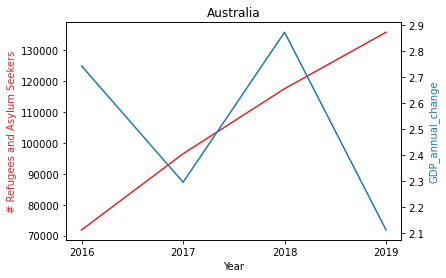

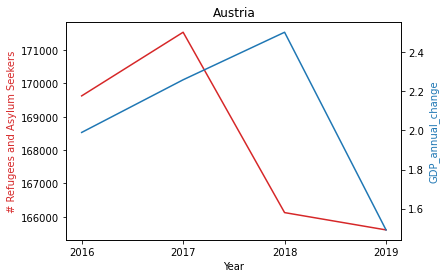

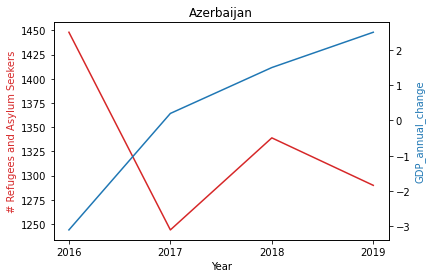

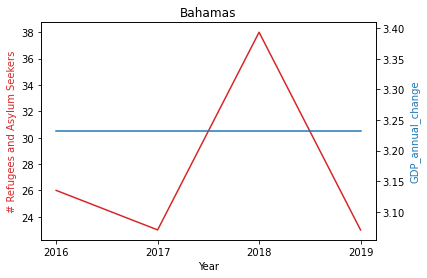

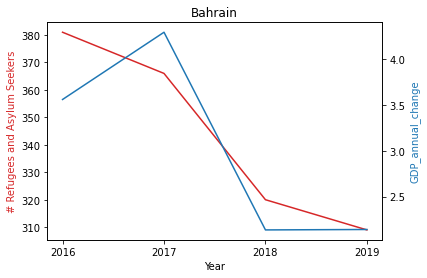

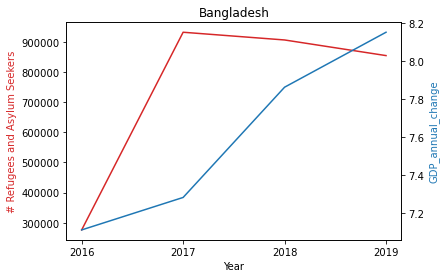

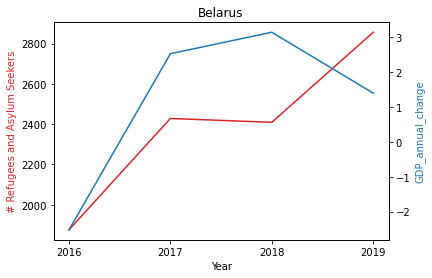

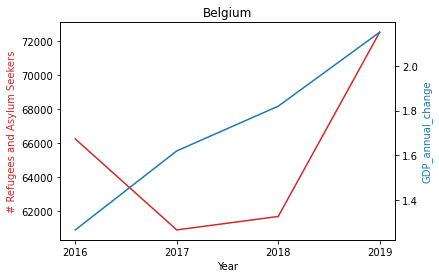

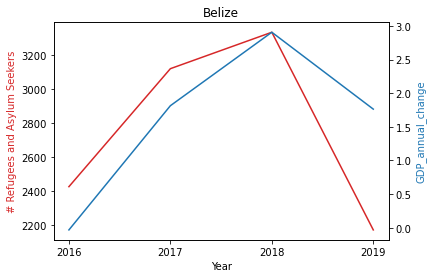

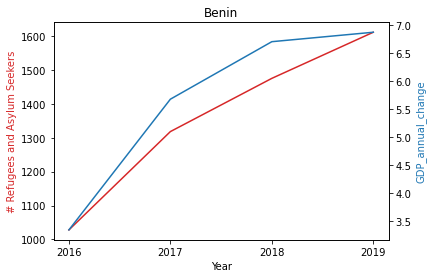

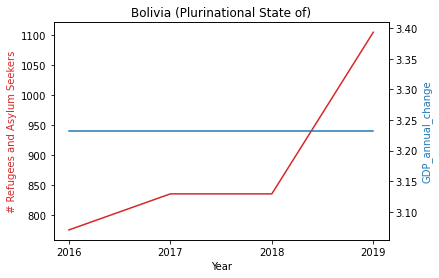

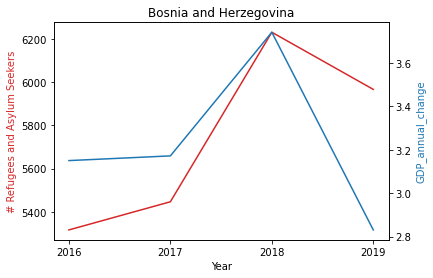

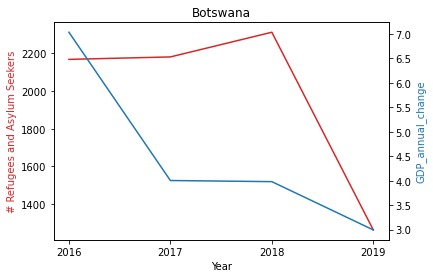

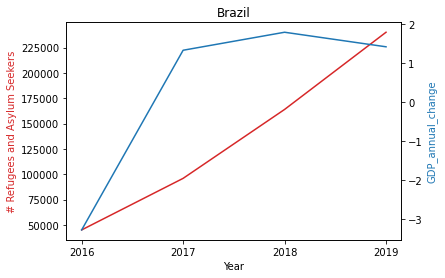

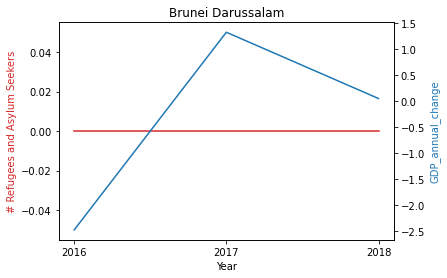

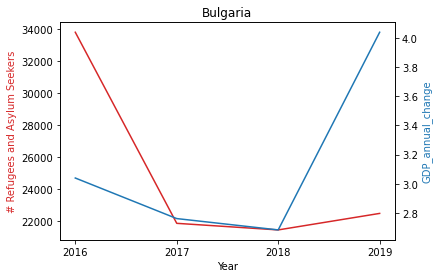

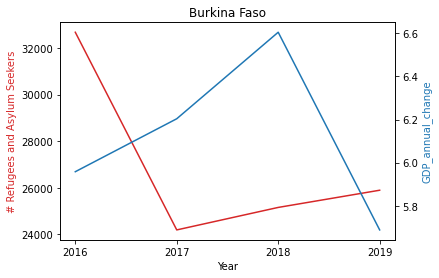

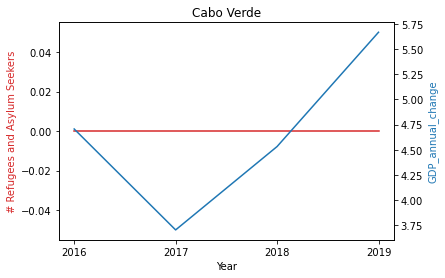

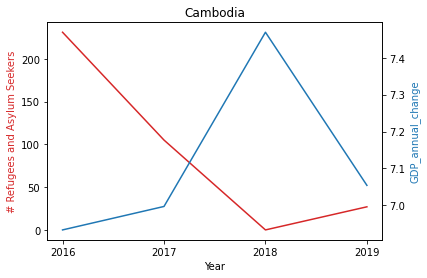

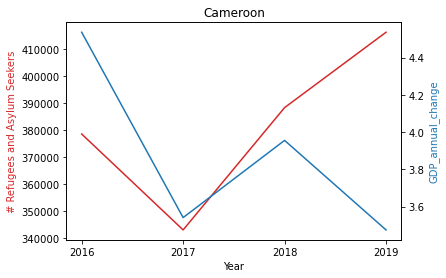

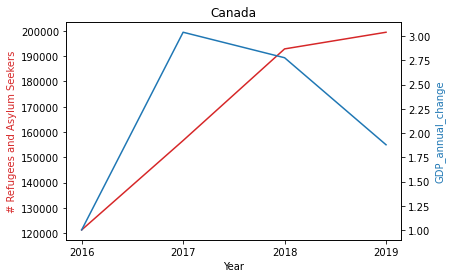

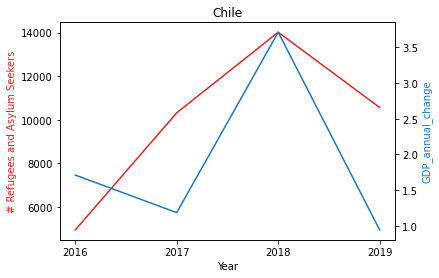

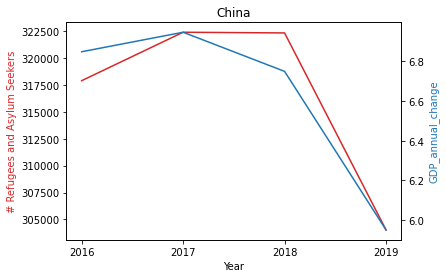

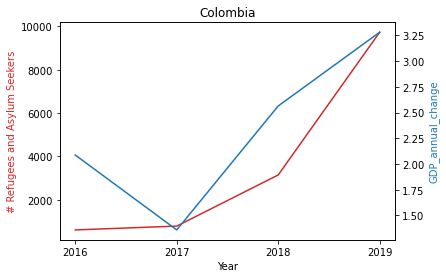

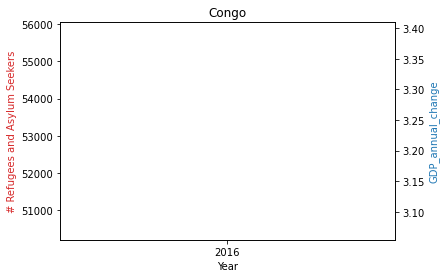

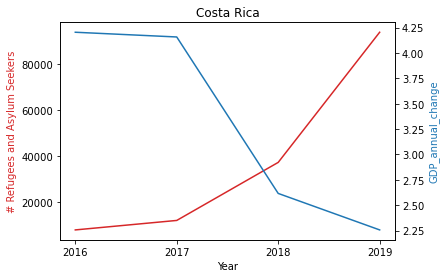

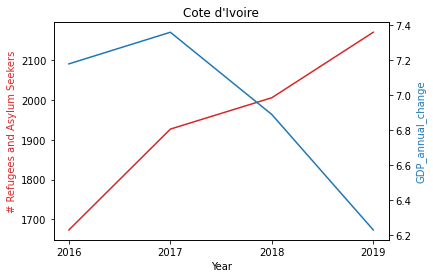

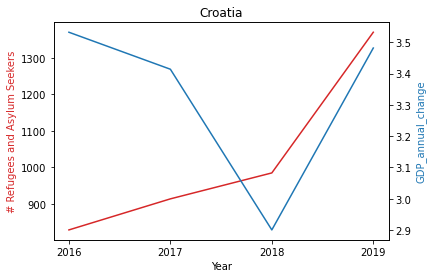

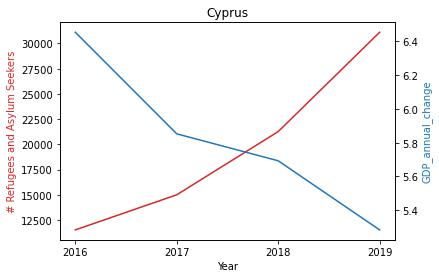

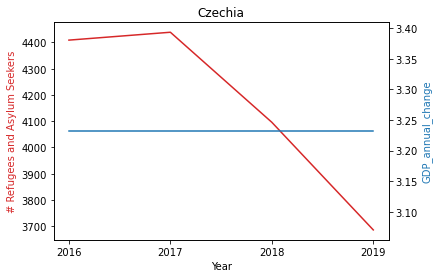

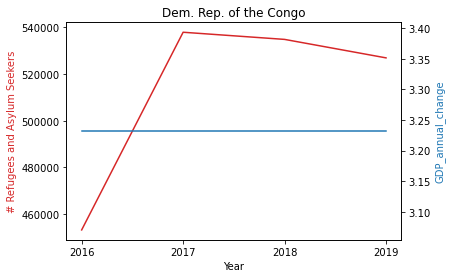

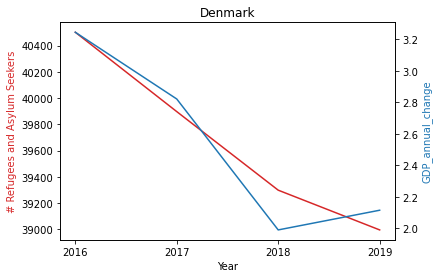

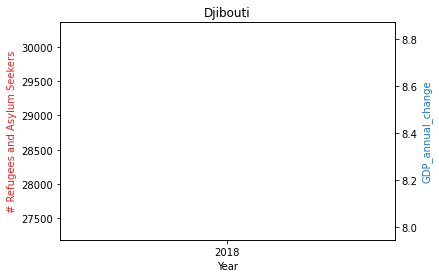

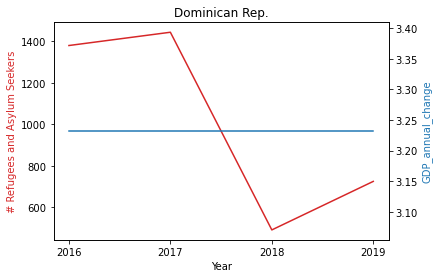

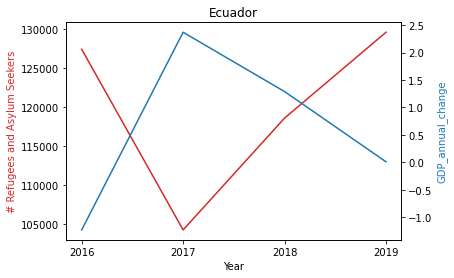

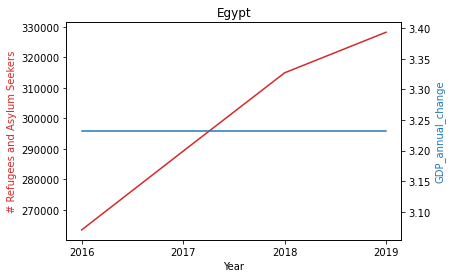

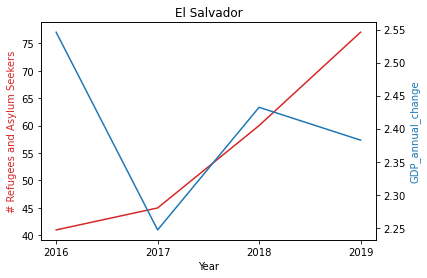

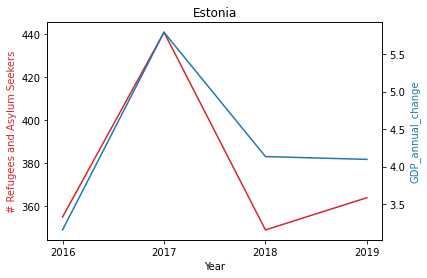

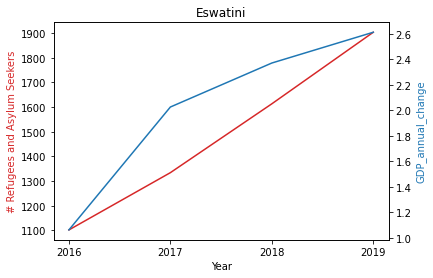

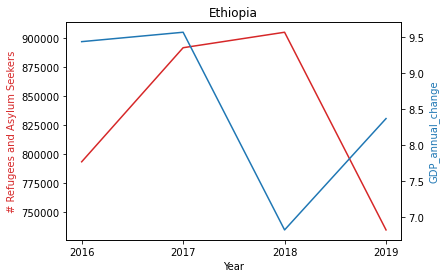

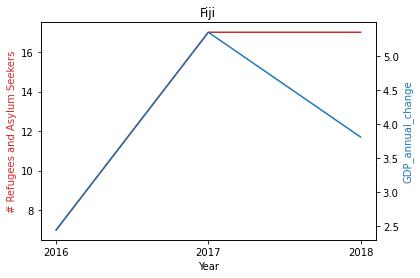

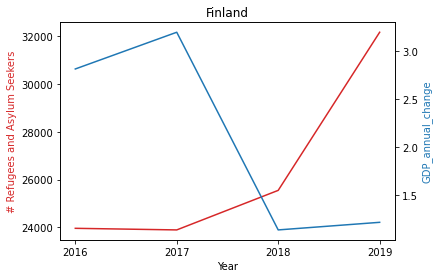

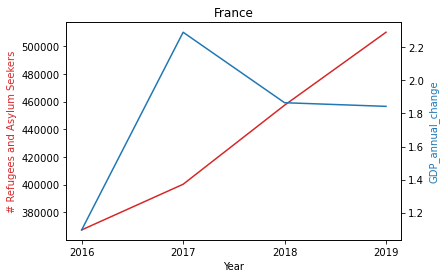

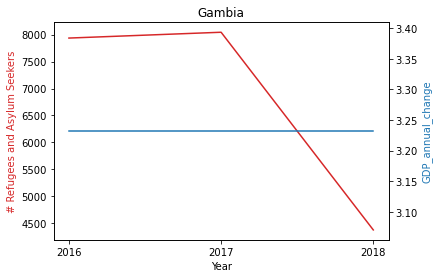

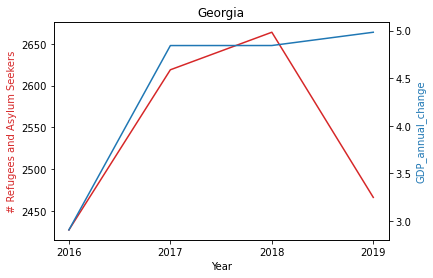

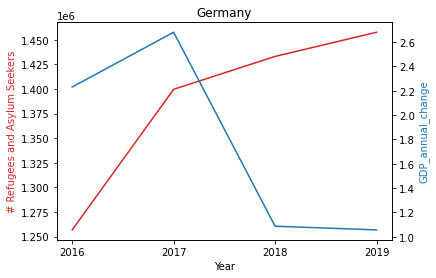

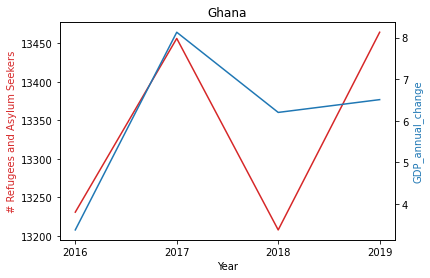

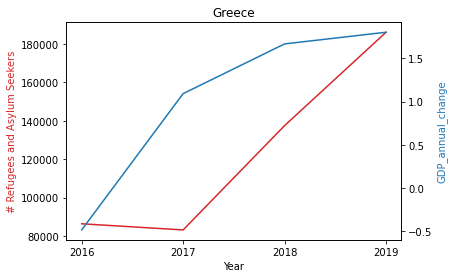

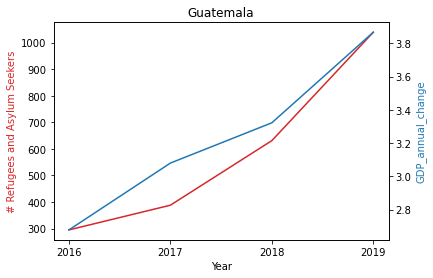

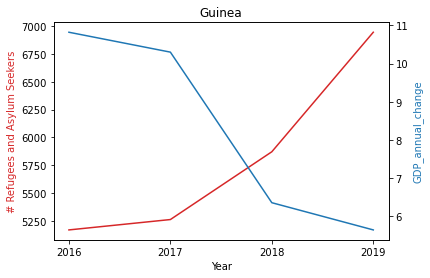

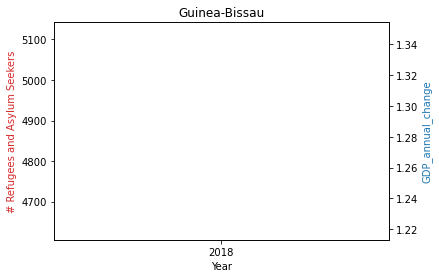

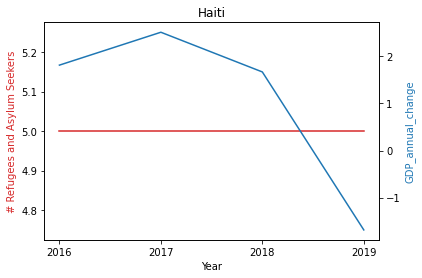

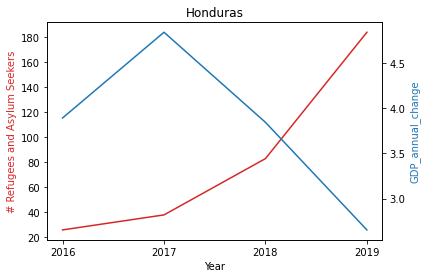

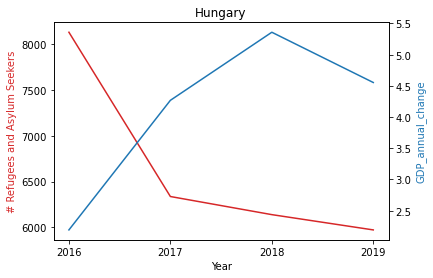

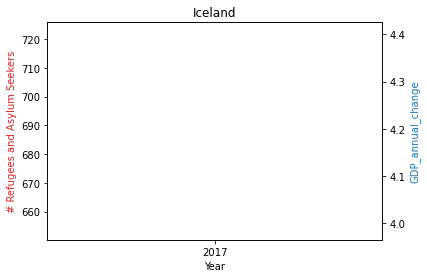

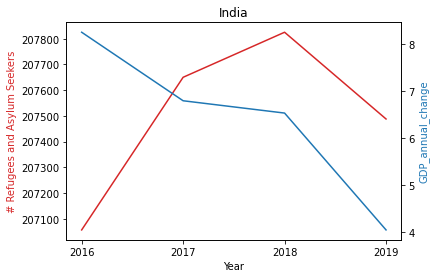

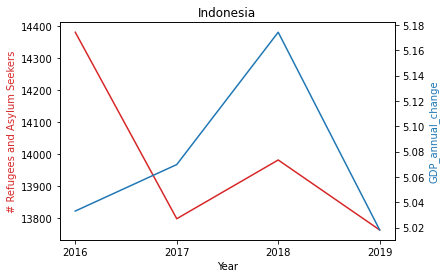

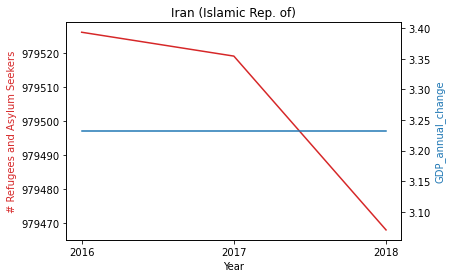

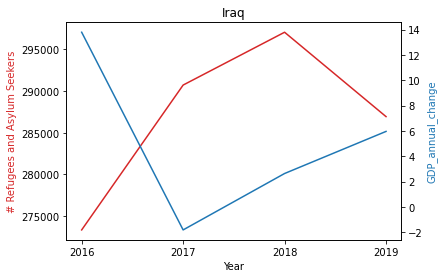

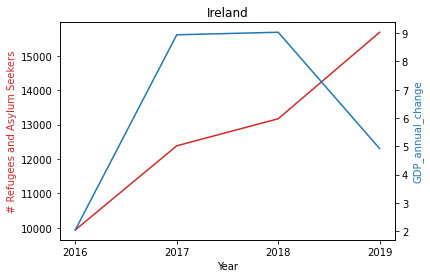

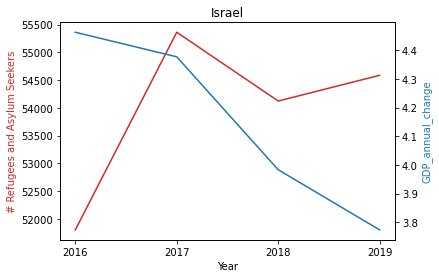

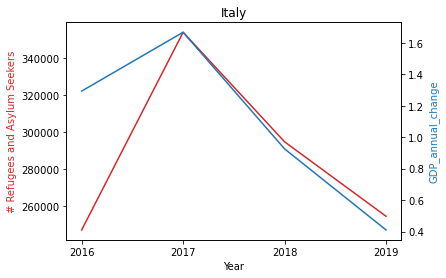

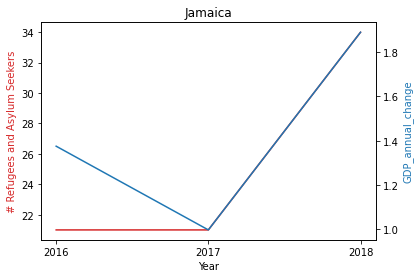

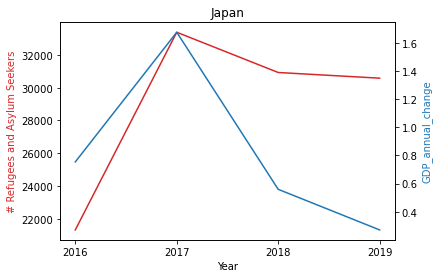

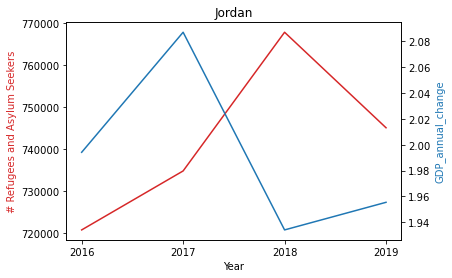

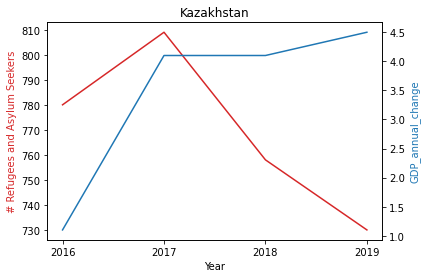

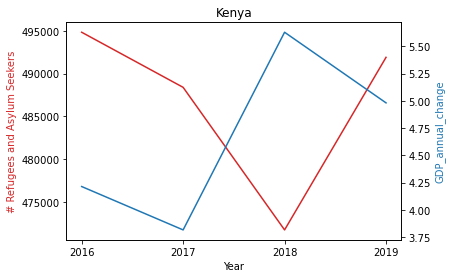

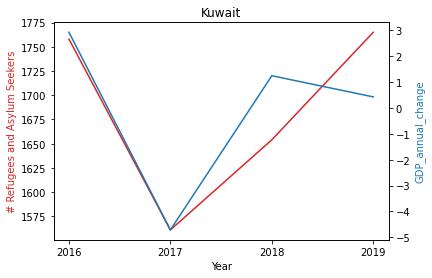

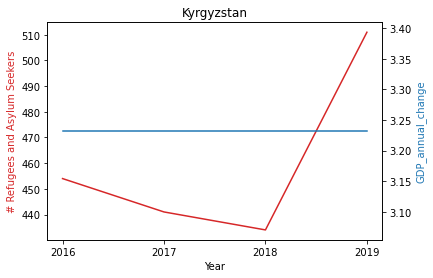

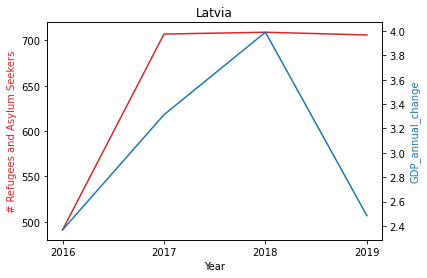

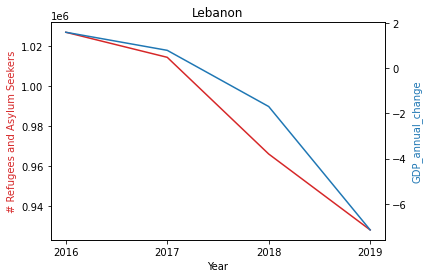

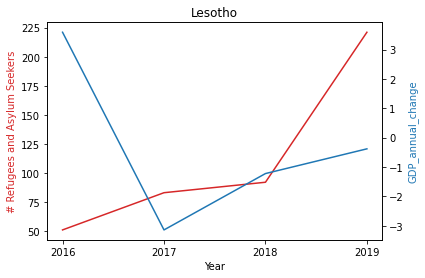

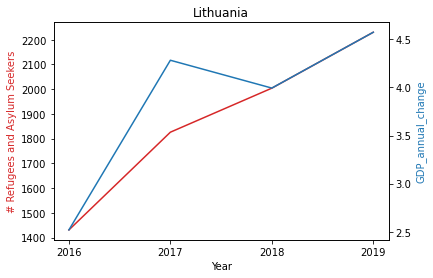

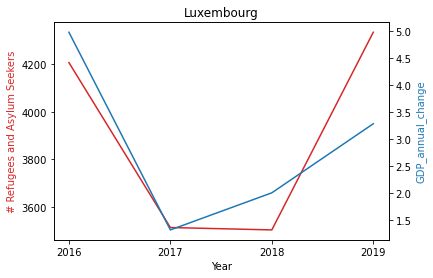

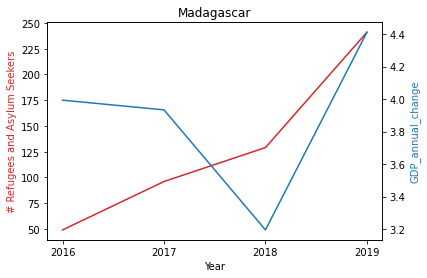

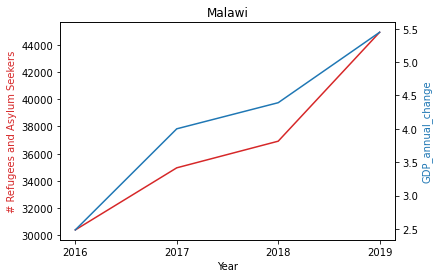

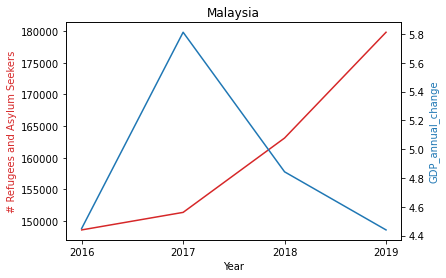

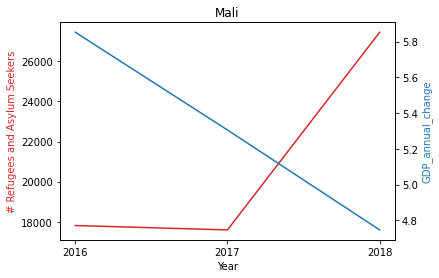

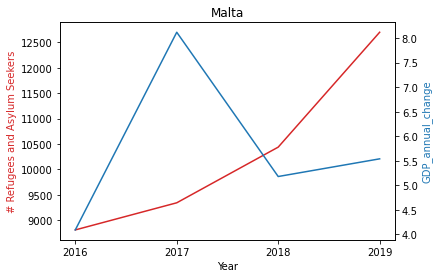

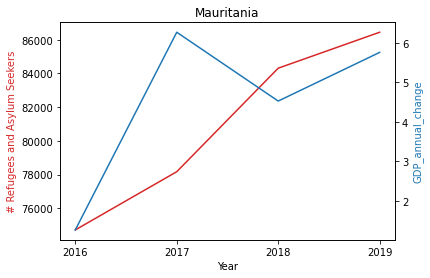

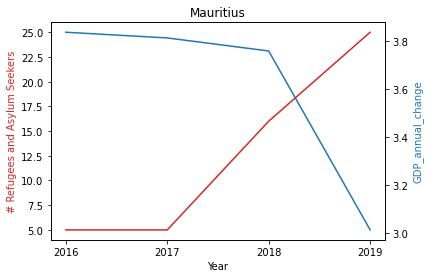

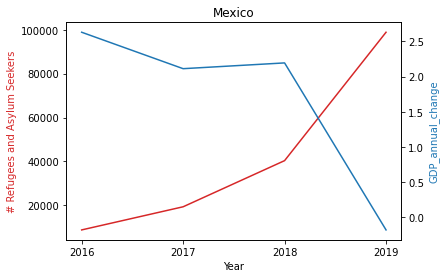

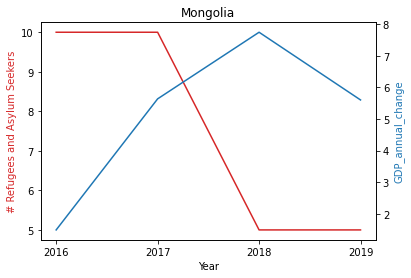

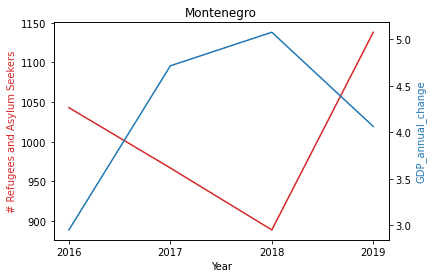

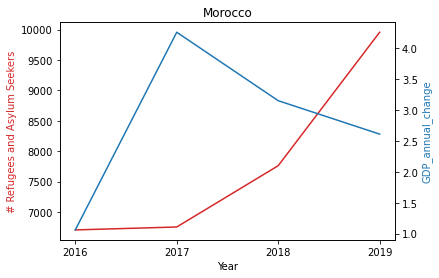

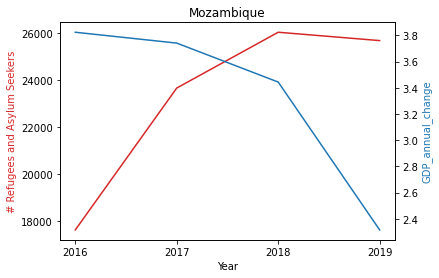

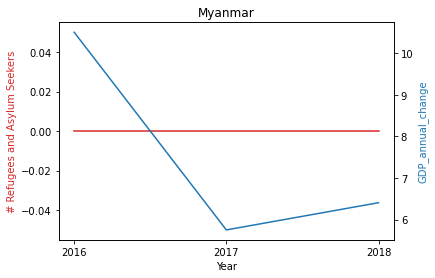

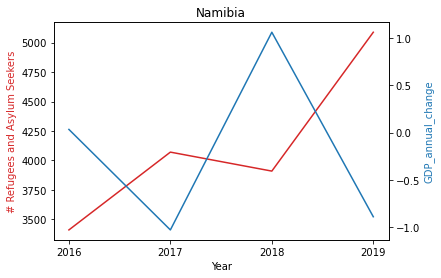

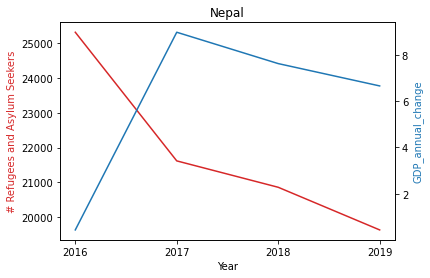

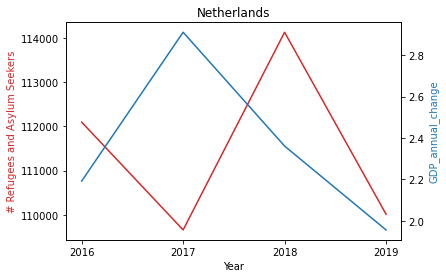

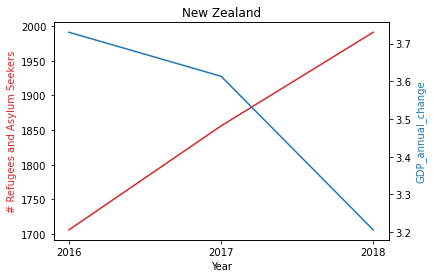

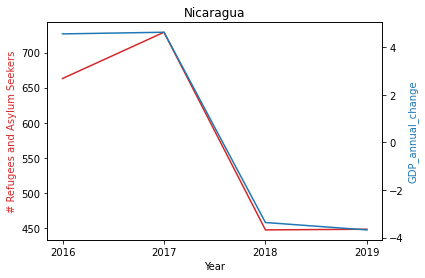

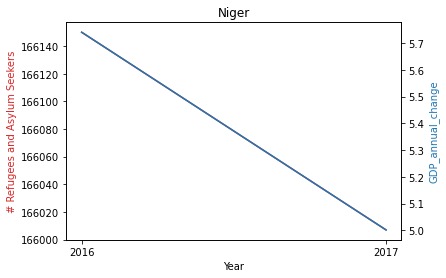

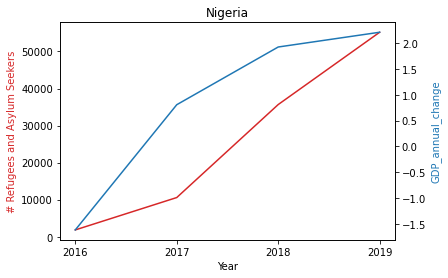

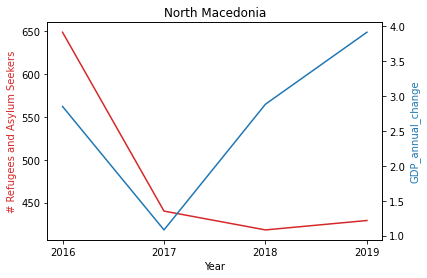

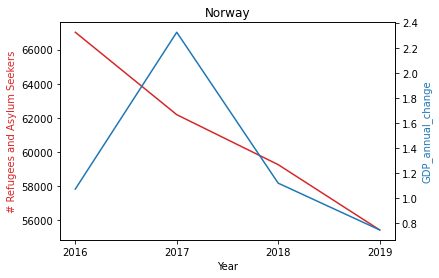

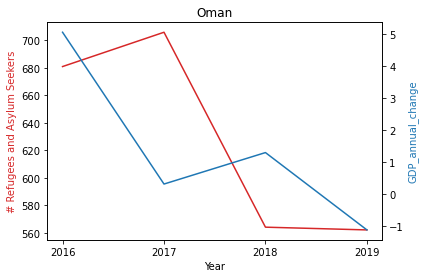

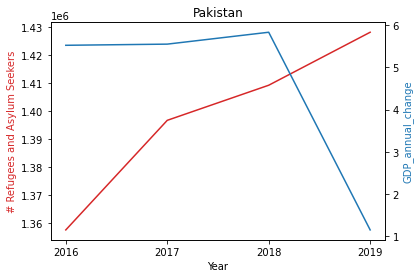

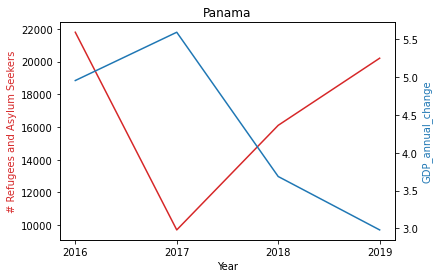

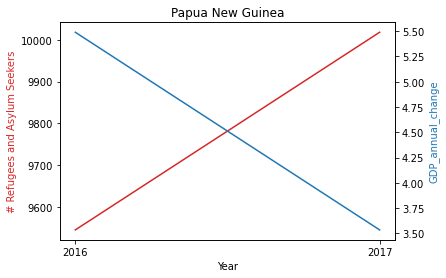

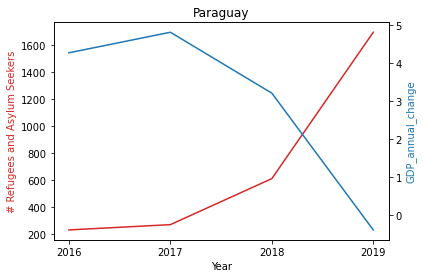

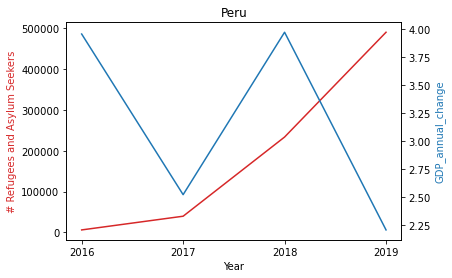

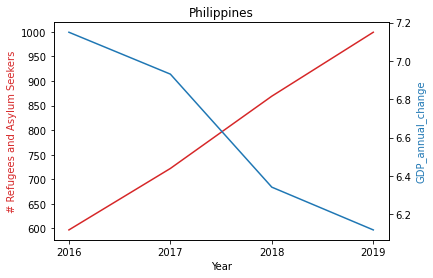

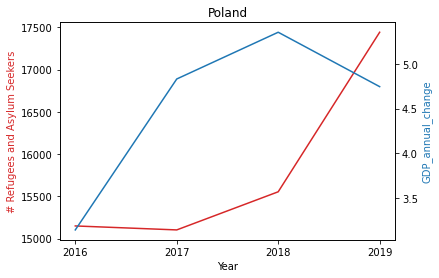

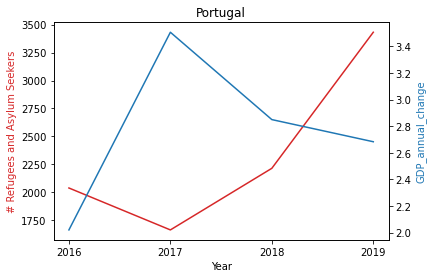

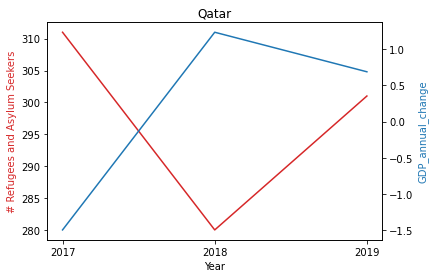

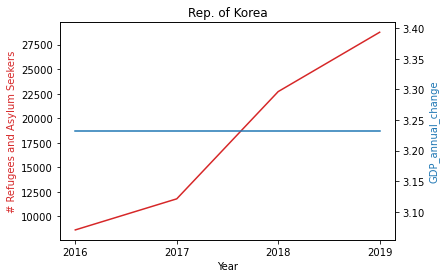

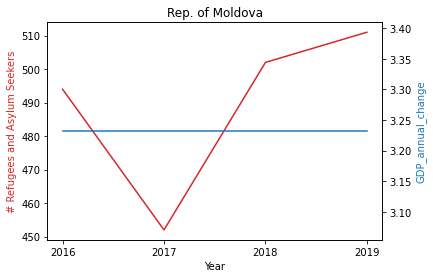

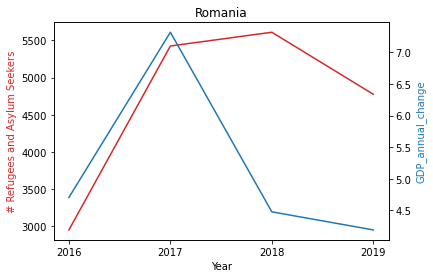

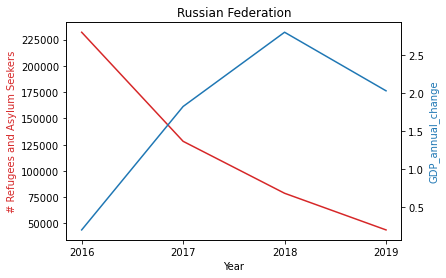

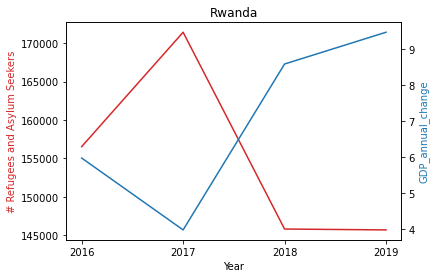

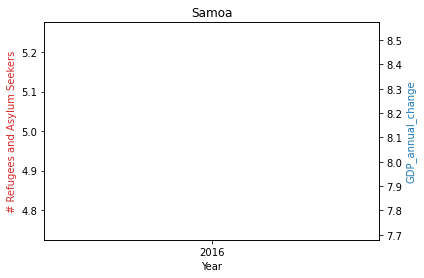

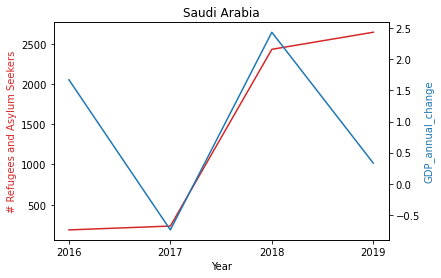

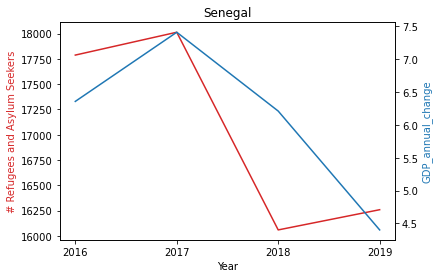

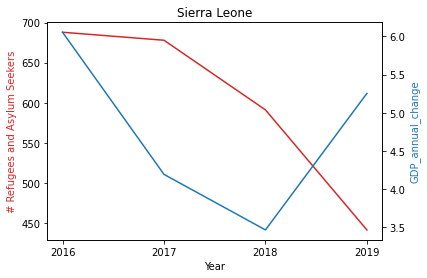

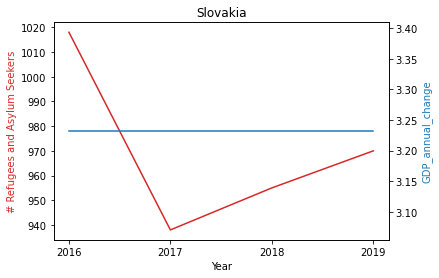

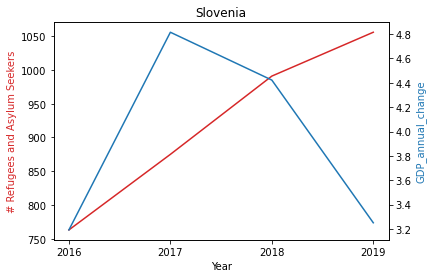

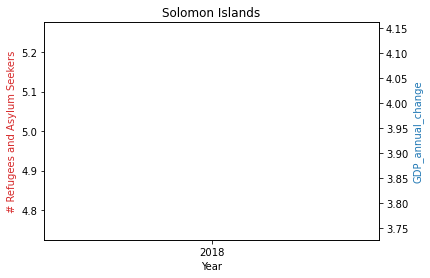

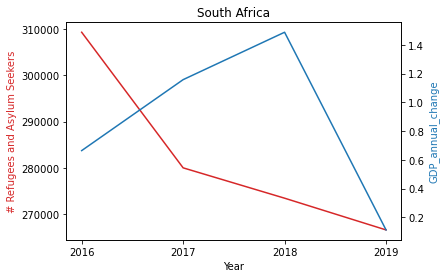

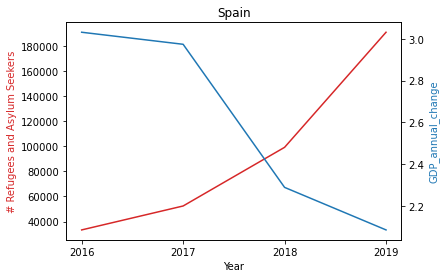

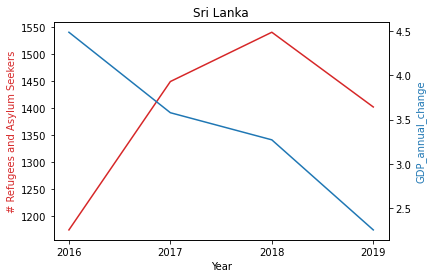

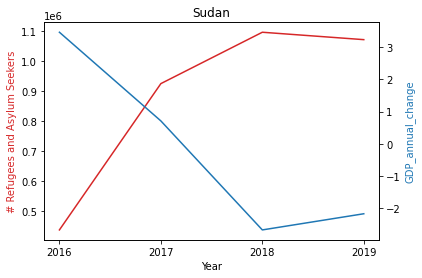

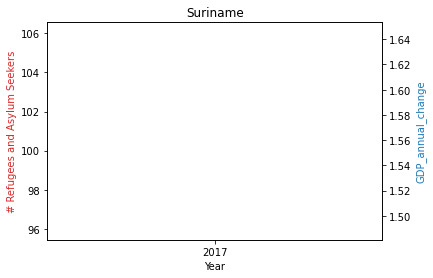

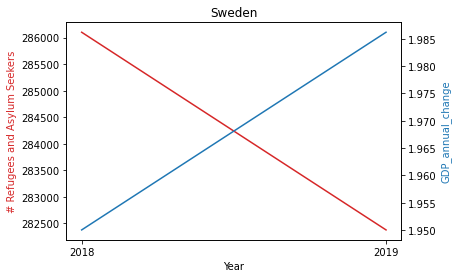

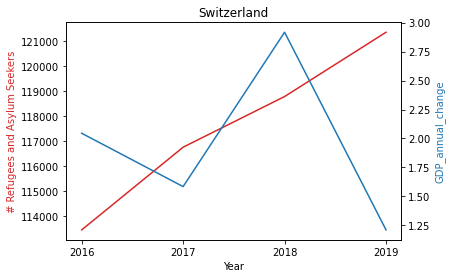

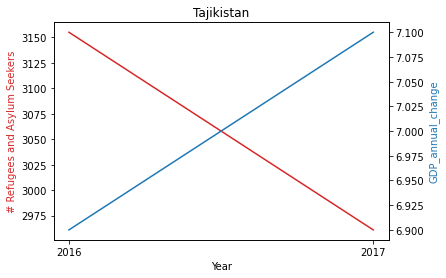

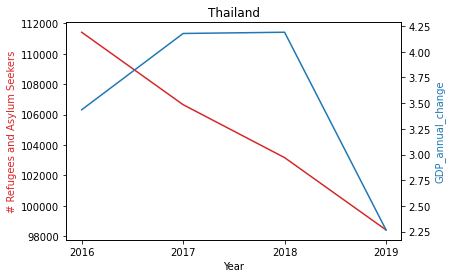

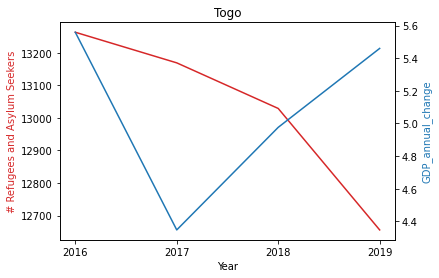

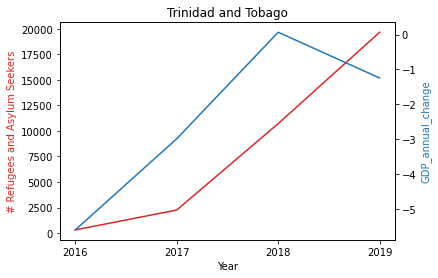

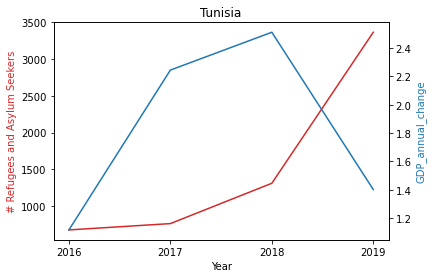

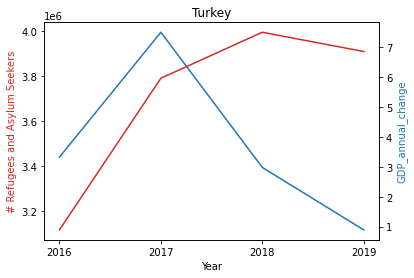

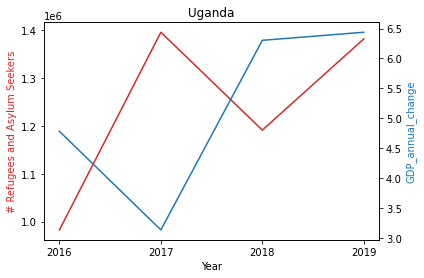

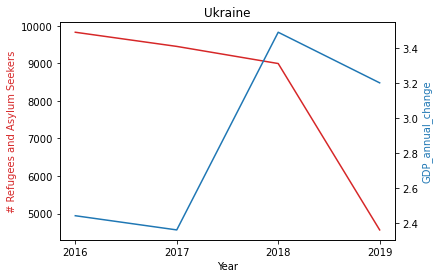

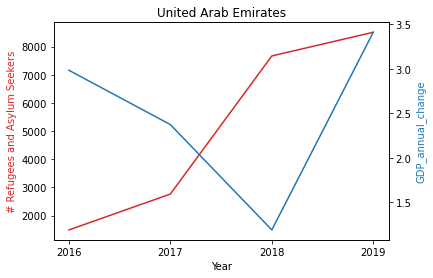

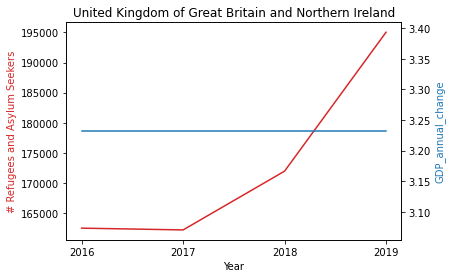

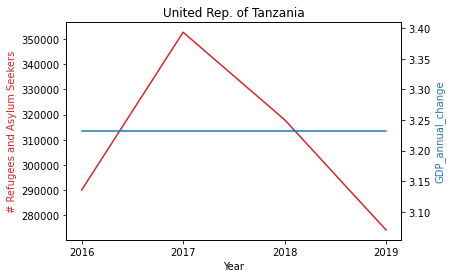

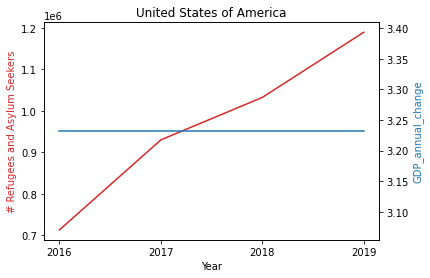

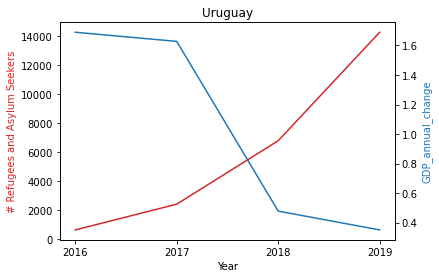

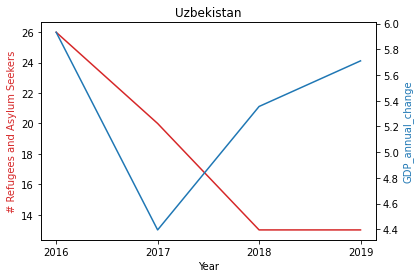

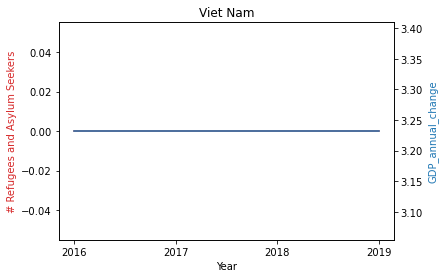

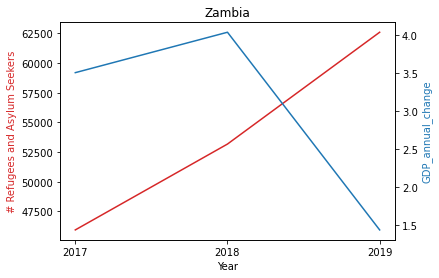

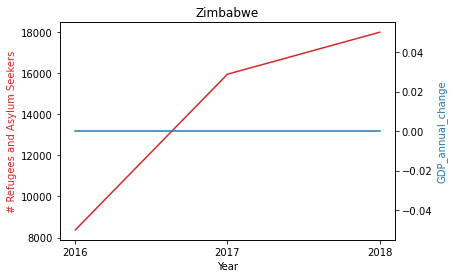

In [133]:
df.sort_values(by=['Country','Year'],inplace=True)
for country in df['Country'].unique():
    # print(country)
# country = 'Afghanistan'
    
    df_temp = df[df['Country']==country].copy()
    df_temp.sort_values(by=['Year'],inplace=True)

    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel('Year')
    ax1.set_ylabel('# Refugees and Asylum Seekers', color=color)
    ax1.plot(df_temp['Year'],df_temp['Ref and Asyl'], color=color)

    ax2 = ax1.twinx() 
    color = 'tab:blue'
    ax2.set_ylabel('GDP_annual_change', color=color)
    ax2.plot(df_temp['Year'],df_temp['GDP_annual_change'], color=color)

    plt.xticks(df_temp['Year'])
    plt.title(country);



In [73]:
wb = pd.read_csv('project-group-project-4-master/data/World_bank_region_income_2.csv' )
wb.head()

Country / Economy                         Region                 Income
0       Afghanistan                    SOUTH ASIA            LOW-INCOME  
1           Albania       EUROPE AND CENTRAL ASIA   UPPER-MIDDLE-INCOME  
2           Algeria  MIDDLE EAST AND NORTH AFRICA   LOWER-MIDDLE INCOME  
3    American Samoa        EAST ASIA AND PACIFIC    UPPER-MIDDLE-INCOME  
4           Andorra       EUROPE AND CENTRAL ASIA           HIGH-INCOME

In [ ]:
df['Inc_Stat']= df['Inc_Stat'].map()
df['Region'] = df['Inc_Stat'].map()

In [74]:
df = pd.merge(df, wb, left_on="Country", right_on="Country / Economy")

In [75]:
df.head()

Year      Country  Refugees under UNHCR's mandate  Asylum-seekers  \
0  2016  Afghanistan                         59770.0           123.0   
1  2017  Afghanistan                         75927.0           215.0   
2  2018  Afghanistan                         72228.0           281.0   
3  2019  Afghanistan                         72227.0           247.0   
4  2016      Albania                           141.0          2750.0   

   IDPs of concern to UNHCR  Stateless persons  Others of concern  \
0                 1797551.0                0.0           114221.0   
1                 1837079.0                0.0           448032.0   
2                 2106893.0                0.0           489854.0   
3                 2553390.0                0.0           447093.0   
4                       0.0             4921.0                0.0   

   Ref and Asyl  SUM REFUGEE  GDP_annual_change  ...  \
0       59893.0    1971665.0           2.260314  ...   
1       76142.0    2361253.0           2.647003  ...   
2       72509.0    2669256.0           1.189228  ...   
3       72474.0    3072957.0           3.911603  ...   
4        2891.0       7812.0           3.314981  ...   

   Military expenditure (current USD)  Population growth (annual %)  \
0                         185878310.1                      2.778035   
1                         191407113.2                      2.547833   
2                         198074728.6                      2.384309   
3                         225835643.9                      2.313073   
4                         130853162.6                     -0.159880   

   Prevalence of undernourishment (% of population)  \
0                                              22.2   
1                                              23.0   
2                                              23.4   
3                                              25.6   
4                                               4.3   

   Refugee population by country or territory of asylum  \
0                                            59770.0      
1                                            75927.0      
2                                            72228.0      
3                                            72227.0      
4                                              141.0      

   Strength of legal rights index (0=weak to 12=strong)  \
0                                                9.0      
1                                                9.0      
2                                               10.0      
3                                               10.0      
4                                                6.0      

   Unemployment, total (% of total labor force) (modeled ILO estimate)  \
0                                             11.158                     
1                                             11.180                     
2                                             11.152                     
3                                             11.217                     
4                                             15.420                     

   Net official flows from UN agencies: Total  Country / Economy  \
0                                1.228899e+08        Afghanistan   
1                                9.173278e+07        Afghanistan   
2                                8.469968e+07        Afghanistan   
3                                2.204802e+08        Afghanistan   
4                                3.329092e+06            Albania   

                     Region                 Income  
0               SOUTH ASIA            LOW-INCOME    
1               SOUTH ASIA            LOW-INCOME    
2               SOUTH ASIA            LOW-INCOME    
3               SOUTH ASIA            LOW-INCOME    
4  EUROPE AND CENTRAL ASIA   UPPER-MIDDLE-INCOME    

[5 rows x 35 columns]

In [129]:
pvt = pd.pivot_table(df, columns='Region', index=['Year'],aggfunc='sum',values='Ref and Asyl')
pvt

Region  EAST ASIA AND PACIFIC    EUROPE AND CENTRAL ASIA   \
Year                                                        
2016                   706139.0                 6239169.0   
2017                   748627.0                 7091452.0   
2018                   776713.0                 7678984.0   
2019                   792301.0                 7778697.0   

Region  LATIN AMERICA AND THE CARIBBEAN  MIDDLE EAST AND NORTH AFRICA   \
Year                                                                     
2016                           236485.0                      3436120.0   
2017                           311028.0                      3487212.0   
2018                           660292.0                      3543876.0   
2019                          1145847.0                      2483537.0   

Region  NORTH AMERICA  SOUTH ASIA   SUB-SAHARAN AFRICA   
Year                                                     
2016         834095.0    1927053.0            4812381.0  
2017        1086481.0    2635799.0            5943477.0  
2018        1225101.0    2618586.0            5770649.0  
2019        1388781.0    2583946.0            5727935.0

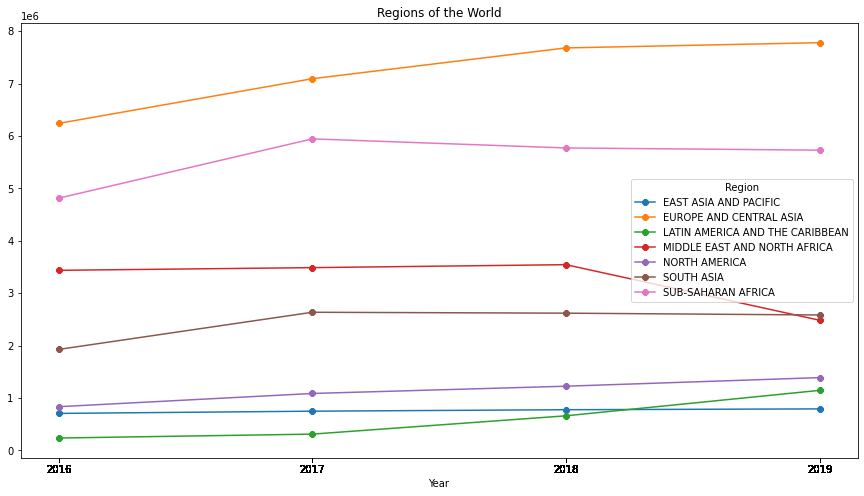

In [131]:



pvt.plot(use_index=True,figsize=(15, 8), marker="8")


plt.xticks(df['Year'])
plt.title('Regions of the World');

In [92]:
pvt2 = pd.pivot_table(df, columns='Income', index=['Year'],aggfunc='sum',values='Ref and Asyl')
pvt2

Income  HIGH-INCOME    LOW-INCOME    LOWER-MIDDLE INCOME    \
Year                                                         
2016        3812922.0     2721995.0              3608986.0   
2017        4414456.0     3753186.0              4441529.0   
2018        5041569.0     3554914.0              4504842.0   
2019        5470494.0     3522219.0              4455486.0   

Income  UPPER-MIDDLE-INCOME    
Year                           
2016                6538730.0  
2017                7116593.0  
2018                7378781.0  
2019                7335094.0

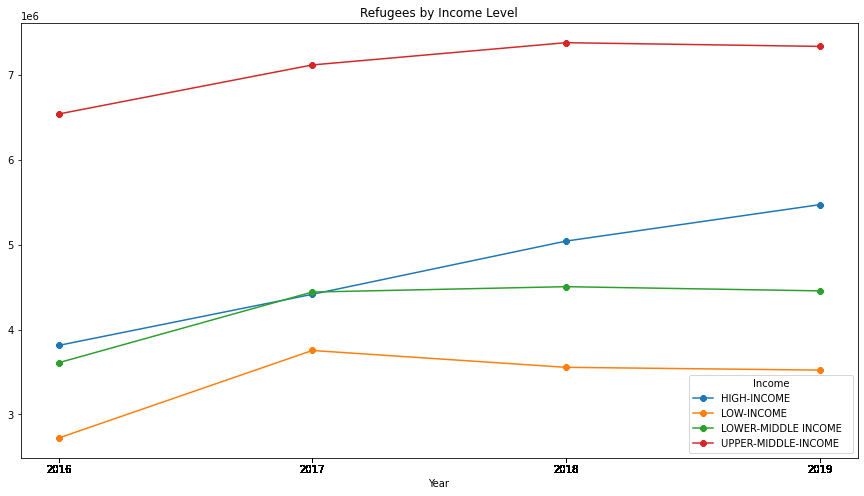

In [132]:
pvt2.plot(subplots=False,use_index=True,figsize=(15, 8), marker="8")
plt.xticks(df['Year'])
plt.title('Refugees by Income Level');

In [165]:
df_temp2 = df.groupby(['Region', 'Year']).agg({'Ref and Asyl':'sum','GDP_annual_change':'mean'}).reset_index()
df_temp2

Region  Year  Ref and Asyl  GDP_annual_change
0           EAST ASIA AND PACIFIC    2016      706139.0           4.301164
1           EAST ASIA AND PACIFIC    2017      748627.0           4.474182
2           EAST ASIA AND PACIFIC    2018      776713.0           4.364075
3           EAST ASIA AND PACIFIC    2019      792301.0           4.117789
4          EUROPE AND CENTRAL ASIA   2016     6239169.0           2.520759
5          EUROPE AND CENTRAL ASIA   2017     7091452.0           3.629207
6          EUROPE AND CENTRAL ASIA   2018     7678984.0           3.314106
7          EUROPE AND CENTRAL ASIA   2019     7778697.0           3.056470
8   LATIN AMERICA AND THE CARIBBEAN  2016      236485.0           1.811042
9   LATIN AMERICA AND THE CARIBBEAN  2017      311028.0           2.533510
10  LATIN AMERICA AND THE CARIBBEAN  2018      660292.0           2.061009
11  LATIN AMERICA AND THE CARIBBEAN  2019     1145847.0           1.170823
12    MIDDLE EAST AND NORTH AFRICA   2016     3436120.0           3.596226
13    MIDDLE EAST AND NORTH AFRICA   2017     3487212.0           1.739098
14    MIDDLE EAST AND NORTH AFRICA   2018     3543876.0           2.540461
15    MIDDLE EAST AND NORTH AFRICA   2019     2483537.0           1.612083
16                    NORTH AMERICA  2016      834095.0           2.116590
17                    NORTH AMERICA  2017     1086481.0           3.135832
18                    NORTH AMERICA  2018     1225101.0           3.004413
19                    NORTH AMERICA  2019     1388781.0           2.555688
20                      SOUTH ASIA   2016     1927053.0           4.679430
21                      SOUTH ASIA   2017     2635799.0           5.806048
22                      SOUTH ASIA   2018     2618586.0           5.386127
23                      SOUTH ASIA   2019     2583946.0           4.360471
24              SUB-SAHARAN AFRICA   2016     4812381.0           3.937042
25              SUB-SAHARAN AFRICA   2017     5943477.0           3.852782
26              SUB-SAHARAN AFRICA   2018     5770649.0           3.741382
27              SUB-SAHARAN AFRICA   2019     5727935.0           3.904984

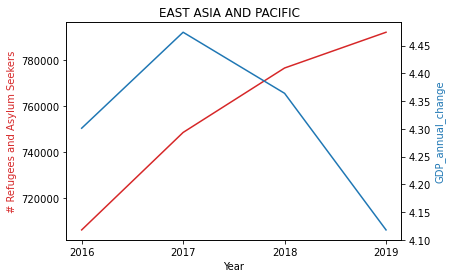

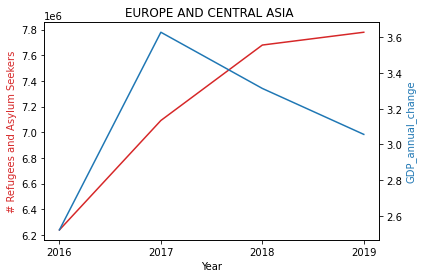

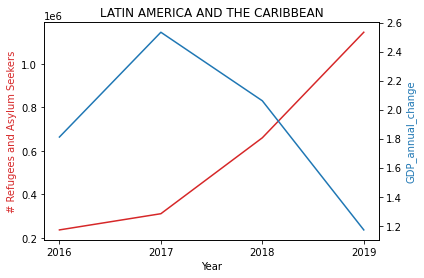

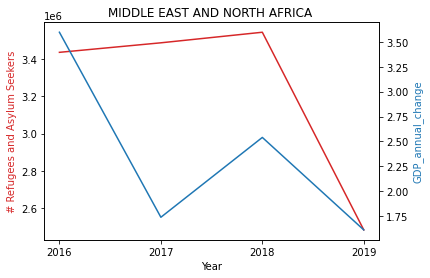

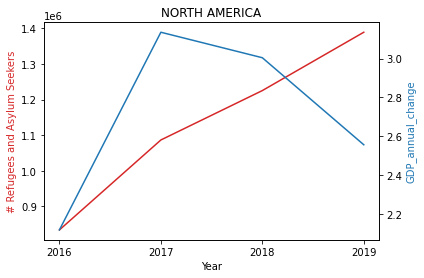

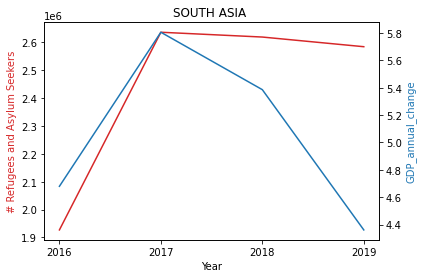

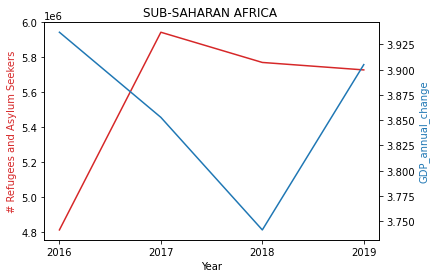

In [166]:
df_temp2.sort_values(by=['Region','Year'],inplace=True)

for region in df_temp2['Region'].unique():
    # print(country)
    # country = 'Afghanistan'
    #  print(region)
    df_temp3 = df_temp[df_temp['Region']==region].copy()
    df_temp3.sort_values(by=['Year'],inplace=True)

    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel('Year')
    ax1.set_ylabel('# Refugees and Asylum Seekers', color=color)
    ax1.plot(df_temp3['Year'],df_temp3['Ref and Asyl'], color=color)

    ax2 = ax1.twinx() 
    color = 'tab:blue'
    ax2.set_ylabel('GDP_annual_change', color=color)
    ax2.plot(df_temp3['Year'],df_temp3['GDP_annual_change'], color=color)

    plt.xticks(df_temp3['Year'])
    plt.title(region);

In [167]:
df_temp4 = df.groupby(['Income', 'Year']).agg({'Ref and Asyl':'sum','GDP_annual_change':'mean'}).reset_index()
df_temp4

Income  Year  Ref and Asyl  GDP_annual_change
0           HIGH-INCOME    2016     3812922.0           2.292398
1           HIGH-INCOME    2017     4414456.0           2.766119
2           HIGH-INCOME    2018     5041569.0           2.742592
3           HIGH-INCOME    2019     5470494.0           2.405535
4            LOW-INCOME    2016     2721995.0           5.295514
5            LOW-INCOME    2017     3753186.0           4.685683
6            LOW-INCOME    2018     3554914.0           4.126902
7            LOW-INCOME    2019     3522219.0           5.018278
8   LOWER-MIDDLE INCOME    2016     3608986.0           3.794010
9   LOWER-MIDDLE INCOME    2017     4441529.0           4.119806
10  LOWER-MIDDLE INCOME    2018     4504842.0           4.041516
11  LOWER-MIDDLE INCOME    2019     4455486.0           3.424579
12  UPPER-MIDDLE-INCOME    2016     6538730.0           2.447954
13  UPPER-MIDDLE-INCOME    2017     7116593.0           3.264721
14  UPPER-MIDDLE-INCOME    2018     7378781.0           2.972585
15  UPPER-MIDDLE-INCOME    2019     7335094.0           2.364124

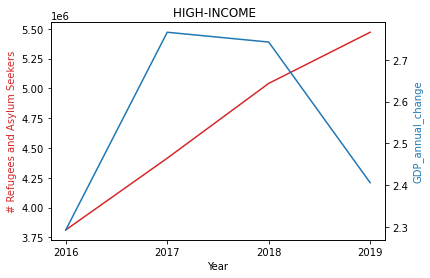

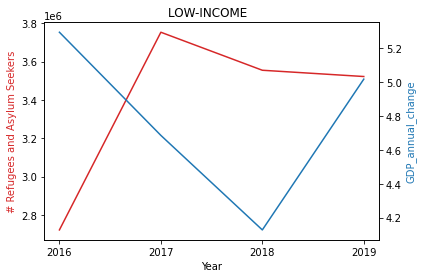

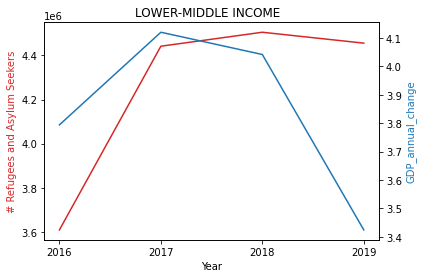

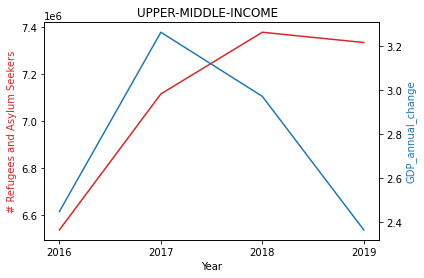

In [170]:
df_temp4.sort_values(by=['Income','Year'],inplace=True)

for income in df_temp4['Income'].unique():
    # print(country)
    # country = 'Afghanistan'
    #  print(region)
    df_temp5 = df_temp4[df_temp4['Income']==income].copy()
    df_temp5.sort_values(by=['Year'],inplace=True)

    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.set_xlabel('Year')
    ax1.set_ylabel('# Refugees and Asylum Seekers', color=color)
    ax1.plot(df_temp5['Year'],df_temp5['Ref and Asyl'], color=color)

    ax2 = ax1.twinx() 
    color = 'tab:blue'
    ax2.set_ylabel('GDP_annual_change', color=color)
    ax2.plot(df_temp5['Year'],df_temp5['GDP_annual_change'], color=color)

    plt.xticks(df_temp5['Year'])
    plt.title(income);